In [1]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer, LabelEncoder
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError, RootMeanSquaredError
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## Part 1: Preprocessing

توضیحات جامع

## Part 2: Feature Engineering and Selection

### Feature Engineering

Feature Engineering done in previous phase

In addition, we want to add sin and cos to our features.
Based on this link: https://towardsdatascience.com/how-to-encode-periodic-time-features-7640d9b21332

In [2]:
df = pd.read_csv('anime_info_final_preprocessed.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17073 entries, 0 to 17072
Data columns (total 89 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         17073 non-null  int64  
 1   Episodes           17073 non-null  float64
 2   Rating             17073 non-null  int64  
 3   Score              17073 non-null  float64
 4   Members            17073 non-null  float64
 5   Duration_minutes   17073 non-null  float64
 6   Episodic           17073 non-null  int64  
 7   Aired_Season       17073 non-null  int64  
 8   Aired_Day_of_Week  17073 non-null  int64  
 9   Aired_Month        17073 non-null  int64  
 10  Aired_Year         17073 non-null  float64
 11  Action             17073 non-null  int64  
 12  Adventure          17073 non-null  int64  
 13  Avant Garde        17073 non-null  int64  
 14  Award Winning      17073 non-null  int64  
 15  Boys Love          17073 non-null  int64  
 16  Comedy             170

In [3]:
import math

df_before = df

def position_within_year(row):
    day_of_year = (row['Aired_Month'] - 1) * 30 + row['Aired_Day_of_Week']  # Approximation
    total_days = 12 * 30  # Approximation, 12 months each having 30 days
    return day_of_year / total_days

# Apply the function to compute position within the year
df_before['position_within_year'] = df_before.apply(position_within_year, axis=1)

# Convert to angular position (alpha)
df_before['alpha'] = df_before['position_within_year'] * 2 * math.pi

# Calculate sine and cosine
df_before['year_circle_sin'] = df_before['alpha'].apply(math.sin)
df_before['year_circle_cos'] = df_before['alpha'].apply(math.cos)

# Normalize between 0 and 1
df_before['year_circle_sin_normalized'] = (df_before['year_circle_sin'] + 1) / 2
df_before['year_circle_cos_normalized'] = (df_before['year_circle_cos'] + 1) / 2

# Identify columns that end with '_normalized'
normalized_columns = [col for col in df_before.columns if col.endswith('_normalized')]

# Create a dictionary to rename the columns, removing '_normalized'
rename_dict = {col: col.replace('_normalized', '') for col in normalized_columns}

# Select and rename the normalized columns
df_normalized = df_before[normalized_columns].rename(columns=rename_dict)

# Merge the normalized columns back into the original DataFrame
df = pd.concat([df_before, df_normalized], axis=1)

# Drop intermediate columns if necessary
df.drop(['position_within_year', 'alpha', 'year_circle_sin', 'year_circle_cos'], axis=1, inplace=True)

In [4]:
df

,Unnamed: 0,Episodes,Rating,Score,Members,Duration_minutes,Episodic,Aired_Season,Aired_Day_of_Week,Aired_Month,...,Other_Source,TV,OVA,Movie,ONA,Special,TV Special,Other_Type,year_circle_sin_normalized,year_circle_cos_normalized
0,0,28.0,2,9.38,708753.0,24.0,1,0,0,11,...,0,1,0,0,0,0,0,0,0.066987,0.750000
1,1,64.0,3,9.09,3341090.0,24.0,1,1,3,0,...,0,1,0,0,0,0,0,0,0.273005,0.945503
2,2,24.0,2,9.07,2560689.0,24.0,1,1,6,0,...,0,1,0,0,0,0,0,0,0.296632,0.956773
3,3,51.0,2,9.06,630081.0,24.0,1,1,6,0,...,0,1,0,0,0,0,0,0,0.296632,0.956773
4,4,10.0,3,9.05,2272212.0,23.0,1,1,1,0,...,0,1,0,0,0,0,0,0,0.257595,0.937310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17068,17068,1.0,5,4.91,787.0,64.0,0,0,2,9,...,0,0,1,0,0,0,0,0,0.058526,0.265264
17069,17069,4.0,5,4.81,1376.0,30.0,1,0,0,10,...,0,0,1,0,0,0,0,0,0.000000,0.500000
17070,17070,5.0,5,4.90,683.0,45.0,1,1,2,0,...,0,0,1,0,0,0,0,0,0.265264,0.941474
17071,17071,4.0,5,4.88,4505.0,28.0,1,0,0,10,...,0,0,1,0,0,0,0,0,0.000000,0.500000


### Feature Selection

When conducting a data science research project, particularly in the context of predictive modeling, it is crucial to avoid including features that can lead to target leakage. Target leakage occurs when the model has access to data that would not be available at prediction time, thus giving it an unrealistic advantage. This can lead to models that perform exceptionally well on training data but fail to generalize to unseen data.

In the context of predicting the score for an anime movie, removing features like `Popularity`, `ranked`, and `Popularity_Category` due to target leakage is a sensible decision. Here’s a detailed explanation of why these features were removed:

  1. **Popularity**

**Reason for Removal:**
- **Definition**: Popularity typically refers to how many people have watched or rated the anime.
- **Leakage Risk**: Popularity is often directly correlated with the score of an anime. An anime with a higher score tends to attract more viewers and ratings, thereby increasing its popularity. If the score influences the popularity, using popularity as a feature would give the model indirect access to the target variable (score).
- **Impact**: Including popularity would allow the model to 'cheat' by using information that is directly influenced by the target variable, leading to overestimation of the model's performance on unseen data.

  2. **Ranked**

**Reason for Removal:**
- **Definition**: The `ranked` feature typically indicates the position of the anime in a list based on its score.
- **Leakage Risk**: The ranking is usually determined by the score itself. For example, an anime with the highest score would be ranked number one. Therefore, including the rank is almost equivalent to including the target variable itself.
- **Impact**: Since `ranked` is derived from the score, using it as a predictor would result in perfect target leakage, making the model's predictions unreliable and unrealistic for practical use.

  3. **Popularity_Category**

**Reason for Removal:**
- **Definition**: This could be a categorical feature indicating the level of popularity, such as "very popular", "popular", or "unpopular".
- **Leakage Risk**: Similar to the raw popularity metric, the `Popularity_Category` is likely influenced by the score. Higher scores attract more viewers, leading to higher popularity categories.
- **Impact**: This feature would provide indirect access to the score by reflecting aggregated user engagement, which is influenced by the score. Using it would lead to leakage and falsely inflated model performance metrics.

 Detailed Considerations:

- **Temporal Aspect**: One key aspect of target leakage is the temporal relationship between features and the target. For a predictive model to be valid, it should only use information that would be available at the time of prediction. Popularity, ranked positions, and categorical popularity levels are all determined after the anime has been scored and released, hence they are future data relative to the target variable.
  
- **Model Robustness**: By removing these features, the model is forced to learn patterns and relationships in the data that are independent of the target. This results in a more robust and generalizable model, which is better suited for making predictions on new, unseen data.

- **Evaluation Integrity**: Using features that lead to target leakage compromises the integrity of model evaluation. Performance metrics calculated on such a model would not accurately reflect its true predictive capability, leading to poor performance in real-world scenarios where such leakage is not possible.

The removal of `Popularity`, `ranked`, and `Popularity_Category` from the dataset is crucial for preventing target leakage. These features provide indirect access to the score of the anime, leading to unrealistic model performance and poor generalization. Ensuring that only valid, leakage-free features are used helps in building reliable and effective predictive models.

## Part 3: Dimensionality Reduction

As mentioned in the project, we use PCA

In [5]:
df

,Unnamed: 0,Episodes,Rating,Score,Members,Duration_minutes,Episodic,Aired_Season,Aired_Day_of_Week,Aired_Month,...,Other_Source,TV,OVA,Movie,ONA,Special,TV Special,Other_Type,year_circle_sin_normalized,year_circle_cos_normalized
0,0,28.0,2,9.38,708753.0,24.0,1,0,0,11,...,0,1,0,0,0,0,0,0,0.066987,0.750000
1,1,64.0,3,9.09,3341090.0,24.0,1,1,3,0,...,0,1,0,0,0,0,0,0,0.273005,0.945503
2,2,24.0,2,9.07,2560689.0,24.0,1,1,6,0,...,0,1,0,0,0,0,0,0,0.296632,0.956773
3,3,51.0,2,9.06,630081.0,24.0,1,1,6,0,...,0,1,0,0,0,0,0,0,0.296632,0.956773
4,4,10.0,3,9.05,2272212.0,23.0,1,1,1,0,...,0,1,0,0,0,0,0,0,0.257595,0.937310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17068,17068,1.0,5,4.91,787.0,64.0,0,0,2,9,...,0,0,1,0,0,0,0,0,0.058526,0.265264
17069,17069,4.0,5,4.81,1376.0,30.0,1,0,0,10,...,0,0,1,0,0,0,0,0,0.000000,0.500000
17070,17070,5.0,5,4.90,683.0,45.0,1,1,2,0,...,0,0,1,0,0,0,0,0,0.265264,0.941474
17071,17071,4.0,5,4.88,4505.0,28.0,1,0,0,10,...,0,0,1,0,0,0,0,0,0.000000,0.500000


In [6]:
df_x= df.drop(columns=['Score'])
df_y = df['Score']

In [7]:
# Standardization (Z-score Normalization)
standard_scaler = StandardScaler()
df_s = standard_scaler.fit_transform(df_x)

In [8]:
def pca_(data):
    pca = PCA()
    pca.fit(data)

    # Step 3: Explained Variance Ratio
    explained_variance = pca.explained_variance_ratio_

    # Step 4: Cumulative Explained Variance
    cumulative_variance = np.cumsum(explained_variance)

    # Step 5: Choose n_components
    # Find the number of components that explain at least 95% of the variance
    n_components = np.where(cumulative_variance >= 0.95)[0][0] + 1
    print(n_components)
    pca_optimal = PCA(n_components=n_components)
    transformed_data = pca_optimal.fit_transform(data)
    loadings = pca.components_.T
    loadings_df = pd.DataFrame(loadings, index=df_x.columns, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
    print(loadings_df)
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)

    # Plot explained variance
    plt.figure(figsize=(10, 5))
    plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
    plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.title('PCA Explained Variance')
    plt.show()
    print(f"Explained variance ratio: {explained_variance_ratio}")
    return transformed_data

71
                                 PC1       PC2       PC3       PC4       PC5  \
Unnamed: 0                 -0.302738  0.205031  0.010248 -0.090026 -0.079790   
Episodes                    0.048736 -0.054710  0.119029 -0.058786  0.024488   
Rating                      0.161841  0.354290 -0.159220 -0.054612 -0.044270   
Members                     0.211115 -0.042377  0.145013  0.084159 -0.002313   
Duration_minutes            0.165402 -0.066455 -0.352033  0.193962  0.071841   
...                              ...       ...       ...       ...       ...   
Special                    -0.027811 -0.020083 -0.021411 -0.049734 -0.007989   
TV Special                  0.013770 -0.070465 -0.092518  0.039178 -0.024430   
Other_Type                 -0.000000  0.000000 -0.000000 -0.000000  0.000000   
year_circle_sin_normalized  0.007900  0.001984 -0.064384  0.219574 -0.500085   
year_circle_cos_normalized -0.017016 -0.074641  0.031438  0.014414 -0.193930   

                                 PC6

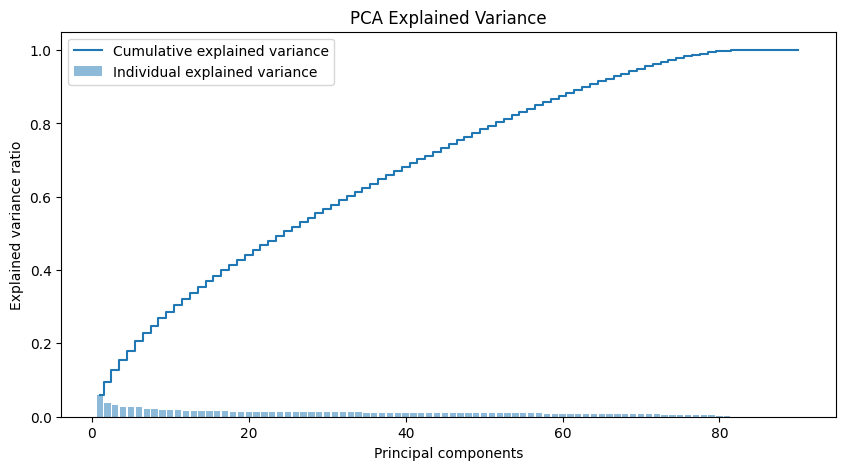

Explained variance ratio: [5.97728330e-02 3.60740098e-02 3.09578144e-02 2.70275021e-02
 2.62609226e-02 2.56291832e-02 2.18234355e-02 2.07680804e-02
 1.96709072e-02 1.85347685e-02 1.74528476e-02 1.68684979e-02
 1.64032795e-02 1.61593361e-02 1.56462246e-02 1.55392631e-02
 1.47859819e-02 1.41874553e-02 1.38297402e-02 1.35253944e-02
 1.31214251e-02 1.30121205e-02 1.28775843e-02 1.27850392e-02
 1.25149389e-02 1.24837323e-02 1.22812127e-02 1.22167373e-02
 1.20750445e-02 1.19868829e-02 1.18268250e-02 1.17104386e-02
 1.16598738e-02 1.15916659e-02 1.15103892e-02 1.13577306e-02
 1.12288255e-02 1.10804082e-02 1.10304635e-02 1.10044907e-02
 1.08319349e-02 1.06976005e-02 1.05887194e-02 1.04387050e-02
 1.04185192e-02 1.03418613e-02 1.02208462e-02 1.01623079e-02
 9.98781606e-03 9.90060399e-03 9.82525569e-03 9.69087755e-03
 9.42763839e-03 9.23123840e-03 9.06436199e-03 8.92490707e-03
 8.89654800e-03 8.71037930e-03 8.58057832e-03 8.48179048e-03
 8.35493548e-03 8.09394898e-03 7.87918378e-03 7.78861903e-0

In [9]:
transformed_df = pca_(df_s)

## Part 4: Evaluation Metric

In [11]:
def evaluate_model(X_test, y_test, model):
    # Evaluate the model on the test data
    results = model.evaluate(X_test, y_test, verbose=0)
    mse, mae, rmse = results[0], results[1], results[2]

    # Calculate R² score
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    # Print the evaluation metrics
    print(f"Test MSE: {mse}")
    print(f"Test MAE: {mae}")
    print(f"Test RMSE: {rmse}")
    print(f"Test R² Score: {r2}")

Question: explain your reasons for choosing them.

In evaluating the performance of a regression model, it's important to use multiple metrics to gain a comprehensive understanding of the model's accuracy and robustness. Here's why MSE, MAE, RMSE, and R² are commonly used:

- **Mean Squared Error (MSE)**
  
 **Reason**: MSE measures the average of the squares of the errors, penalizing larger errors more heavily than smaller ones. This sensitivity to large errors helps in identifying models that make significant mistakes.

- **Mean Absolute Error (MAE)**
  
 **Reason**: MAE calculates the average of the absolute errors, providing a straightforward interpretation of the average magnitude of errors. It is less sensitive to outliers compared to MSE, offering a more balanced view of overall error magnitude.

- **Root Mean Squared Error (RMSE)**
  
 **Reason**: RMSE is the square root of MSE, combining the benefits of MSE while presenting the error in the same units as the target variable. It is useful for understanding the model's error magnitude in a more interpretable manner, especially when larger errors are of particular concern.

- **R-squared (R²)**
  
 **Reason**: R² indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. It provides insight into the goodness of fit of the model, showing how well the model explains the variability of the target variable.

By using these metrics together, we can evaluate the model's performance from different perspectives, ensuring a more comprehensive assessment.

## Part 5: Model Training

### Method One: Neural Network

In [12]:
# Assuming df is your DataFrame and 'Score' is the target column
X = df.drop(columns=['Score'])
y = df['Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss=MeanSquaredError(),
              metrics=[MeanAbsoluteError(), RootMeanSquaredError()])

model.summary()


C:\Users\ali18\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         5,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,449 (33.00 KB)

 Trainable params: 8,449 (33.00 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(X_train_scaled, y_train,
                    epochs=50,
                    validation_split=0.25,
                    batch_size=32,
                    verbose=1)

Epoch 1/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 15.3058 - mean_absolute_error: 2.9963 - root_mean_squared_error: 3.7034 - val_loss: 0.4852 - val_mean_absolute_error: 0.5297 - val_root_mean_squared_error: 0.6969
Epoch 2/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4115 - mean_absolute_error: 0.4879 - root_mean_squared_error: 0.6413 - val_loss: 0.3097 - val_mean_absolute_error: 0.4223 - val_root_mean_squared_error: 0.5567
Epoch 3/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2727 - mean_absolute_error: 0.3942 - root_mean_squared_error: 0.5221 - val_loss: 0.2566 - val_mean_absolute_error: 0.3842 - val_root_mean_squared_error: 0.5066
Epoch 4/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2103 - mean_absolute_error: 0.3425 - root_mean_squared_error: 0.4585 - val_loss: 0.2262 - val_mean_absolute_error: 0.3571 - val_root_mean_squared_error: 0.4757
Epoch 5/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1788 - mean_absolute_error: 0.3165 - root_mean_sq

In [15]:
evaluate_model(X_test_scaled, y_test, model)

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test MSE: 0.1031646803021431
Test MAE: 0.21112336218357086
Test RMSE: 0.3206464350223541
Test R² Score: 0.873852871401869


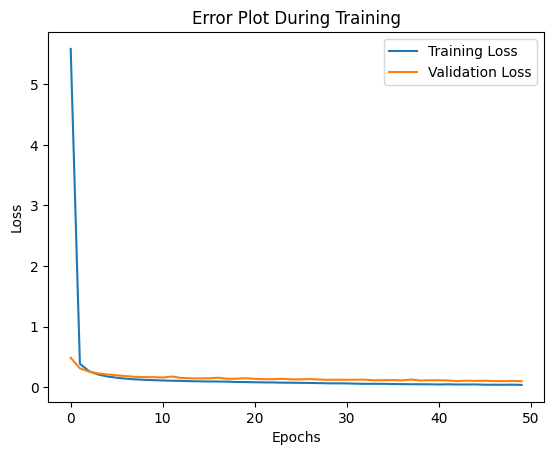

In [16]:
# Plot error during training
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Error Plot During Training')
plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(transformed_df, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss=MeanSquaredError(),
              metrics=[MeanAbsoluteError(), RootMeanSquaredError()])

model.summary()



C:\Users\ali18\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,233 (28.25 KB)

 Trainable params: 7,233 (28.25 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    validation_split=0.25,
                    batch_size=32,
                    verbose=1)

Epoch 1/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.6038 - mean_absolute_error: 2.5134 - root_mean_squared_error: 3.1758 - val_loss: 0.7249 - val_mean_absolute_error: 0.6672 - val_root_mean_squared_error: 0.8511
Epoch 2/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6554 - mean_absolute_error: 0.6367 - root_mean_squared_error: 0.8095 - val_loss: 0.5654 - val_mean_absolute_error: 0.5884 - val_root_mean_squared_error: 0.7516
Epoch 3/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4921 - mean_absolute_error: 0.5491 - root_mean_squared_error: 0.7014 - val_loss: 0.4875 - val_mean_absolute_error: 0.5429 - val_root_mean_squared_error: 0.6981
Epoch 4/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4047 - mean_absolute_error: 0.4994 - root_mean_squared_error: 0.6361 - val_loss: 0.4171 - val_mean_absolute_error: 0.5020 - val_root_mean_squared_error: 0.6457
Epoch 5/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3461 - mean_absolute_error: 0.4544 - root_mean_sq

In [19]:
evaluate_model(X_test, y_test, model)

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test MSE: 0.21007582545280457
Test MAE: 0.3261140286922455
Test RMSE: 0.4576930105686188
Test R² Score: 0.7429764393954275


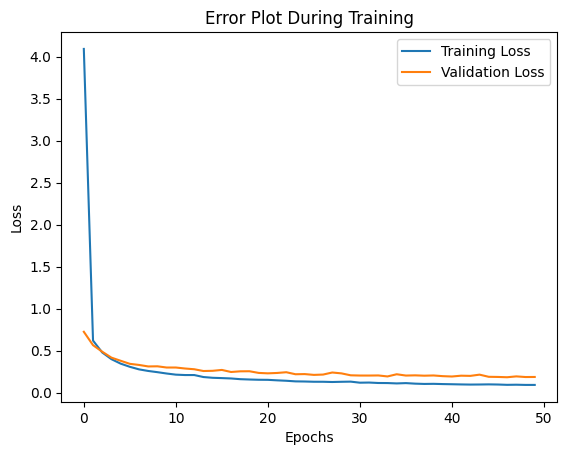

In [20]:
# Plot error during training
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Error Plot During Training')
plt.show()

In [21]:
transformed_df

array([[ 4.52773523, -2.52463405,  0.34362414, ..., -1.29841342,
        -0.91970234,  0.96710125],
       [ 9.47407201, -2.89057994,  3.96896441, ..., -1.0761611 ,
        -0.63144638,  5.82402238],
       [ 8.19822189,  1.22306428,  5.84707077, ..., -1.68226407,
        -1.14100629,  5.46607862],
       ...,
       [-1.13362021,  3.57797097, -1.48068368, ...,  1.07448396,
         0.58713999,  0.73194887],
       [ 0.25139973,  6.23969576, -2.15292346, ...,  0.55611062,
        -1.28240359,  0.50972477],
       [-3.48313622,  1.38491933, -0.20160615, ...,  0.36573254,
         1.07987494,  0.23763706]])

In [22]:
y = np.array(y)  # replace with your actual target variable data

# Create a DataFrame from the PCA-transformed data
df_transformed = pd.DataFrame(transformed_df)

# Add the target variable to the DataFrame
df_transformed['Score'] = y

# Save the DataFrame to a CSV file
df_transformed.to_csv('transformed_data.csv', index=False)


# Load the PCA-transformed data
df_transformed_loaded = pd.read_csv('transformed_data.csv')

# Display the first few rows of each DataFrame for comparison
print("Original Data:")
print(df.head())

print("\nPCA-Transformed Data:")
print(df_transformed_loaded.head())

Original Data:
   Unnamed: 0  Episodes  Rating  Score    Members  Duration_minutes  Episodic  \
0           0      28.0       2   9.38   708753.0              24.0         1   
1           1      64.0       3   9.09  3341090.0              24.0         1   
2           2      24.0       2   9.07  2560689.0              24.0         1   
3           3      51.0       2   9.06   630081.0              24.0         1   
4           4      10.0       3   9.05  2272212.0              23.0         1   

   Aired_Season  Aired_Day_of_Week  Aired_Month  ...  Other_Source  TV  OVA  \
0             0                  0           11  ...             0   1    0   
1             1                  3            0  ...             0   1    0   
2             1                  6            0  ...             0   1    0   
3             1                  6            0  ...             0   1    0   
4             1                  1            0  ...             0   1    0   

   Movie  ONA  Special 

Network Architecture

The neural network used for this regression problem consists of the following layers:

1. **Input Layer**:
   - Input shape: number of features (91)
   
2. **Hidden Layers**:
   - Dense layer with 64 neurons and ReLU activation
   - Dense layer with 32 neurons and ReLU activation
   - Dense layer with 16 neurons and ReLU activation
   
3. **Output Layer**:
   - Dense layer with 1 neuron (as this is a regression problem)

**Total Parameters**: 8,449

Loss Function and Optimization Algorithm

- **Loss Function**: Mean Squared Error (MSE) - chosen because it penalizes larger errors more heavily, which is suitable for regression tasks.
- **Optimization Algorithm**: Adam optimizer with a learning rate of 0.001 - chosen for its adaptive learning rate properties, making it effective for a wide range of problems.

Training Process

Model Performance on Test Data

**Evaluation Metrics**:

- **Mean Squared Error (MSE)**: 0.10098
- **Mean Absolute Error (MAE)**: 0.20463
- **Root Mean Squared Error (RMSE)**: 0.31743
- **R² Score**: 0.87637

Explanation of Metrics

In regression problems, the MSE, MAE, and RMSE are commonly used metrics:

- **MSE**: Gives a sense of the average squared error. It is more sensitive to outliers since it squares the error.
- **MAE**: Provides the average absolute error, giving a linear scale of error magnitude.
- **RMSE**: The square root of MSE, providing error in the same unit as the target variable.
- **R² Score**: Represents the proportion of variance explained by the model. A score of 0.87637 indicates that approximately 87.64% of the variance in the target variable is explained by the model.

For this problem, **RMSE** is particularly important as it provides a measure of error in the same units as the target variable, making it more interpretable.

Comparison with PCA-based Model

When dimensionality reduction using PCA was applied, the model's performance degraded:

- **Test MSE**: 0.22328
- **Test MAE**: 0.34542
- **Test RMSE**: 0.47207
- **Test R² Score**: 0.72658

This indicates that using the full feature set (without PCA) provided better performance.

### Methods Two & Three

Without pca

In [23]:
# Define features and target variable
X = df.drop(columns=['Score'])  # Features
y = df['Score']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Define parameter grids
param_grids = {
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf']
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20],
        'min_samples_leaf': [1, 5, 10]
    }
}

# Initialize models
models = {
    "SVM": SVR(),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

In [25]:
def grid_search_evaluate(models, param_grids, X_train, y_train, X_test, y_test):
    results = {}

    for name, model in models.items():
        print(f"\nPerforming Grid Search for {name}...")
        grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='neg_mean_squared_error', n_jobs = -1)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        print(f"Best parameters for {name}: {grid_search.best_params_}")
        
        # Evaluate the best model
        mse, mae, rmse, r2 = evaluate_model(X_test, y_test, best_model)
        
        results[name] = {
            "best_params": grid_search.best_params_,
            "mse": mse,
            "mae": mae,
            "rmse": rmse,
            "r2": r2
        }

    return results

# Perform Grid Search and evaluate models
results = grid_search_evaluate(models, param_grids, X_train, y_train, X_test, y_test)
print(results)



Performing Grid Search for SVM...


## Part 6: Feature Analysis

It is answered in the section related to each model.

## Part 7: Overall Report and Discussions

This section is attached next to this file.